In [23]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("~/Desktop/ML_Washington/WashingtonML/Regression/Week2/kc_house_data.csv")

In [3]:
sales = sales.sort_values(['sqft_living','price'])

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [6]:
def polynomial_sframe(feature, degree):
    df = pd.DataFrame({'power_1':feature})
    if degree > 1:
        for d in range(2,degree+1):
            name = 'power_' + str(d)
            df[name] = df['power_1'].apply(lambda x:x**d)
    return df

In [7]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)

In [8]:
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000


In [9]:
l2_small_penalty = 1.5e-5
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [11]:
print(model.intercept_)
print(model.coef_)

220664.3750542053
[ 1.24873306e+02 -4.77376011e-02  3.01446238e-05 -2.44419942e-09
 -1.94153675e-13  8.54085686e-18  1.51142121e-21  8.27979094e-26
  6.52603100e-31 -3.27895017e-34 -3.87962315e-38 -2.72437650e-42
 -1.07790800e-46  3.78242694e-51  1.39790296e-54]


In [12]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [15]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

set_1 = set_1.sort_values(['sqft_living','price'])
set_2 = set_2.sort_values(['sqft_living','price'])
set_3 = set_3.sort_values(['sqft_living','price'])
set_4 = set_4.sort_values(['sqft_living','price'])

[539058.81866914]
[[ 3.05794168e-90  2.21229707e-49  8.63660731e-55  1.21888907e-88
   3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
   4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
   3.62176959e-44 -5.63501661e-48  2.18641116e-52]]


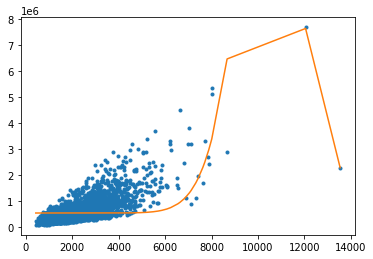

In [24]:
regressor = LinearRegression()
poly_set_1 = polynomial_sframe(set_1['sqft_living'],15)
model_set_1 = regressor.fit(poly_set_1, set_1['price'].values.reshape(-1,1))
print(model_set_1.intercept_)
print(model_set_1.coef_)
plt.plot(poly_set_1['power_1'],set_1['price'],'.',
         poly_set_1['power_1'], model_set_1.predict(poly_set_1),'-')

In [16]:
l2_small_penalty_2=1e-9

[539058.81866914]
[[ 3.05794168e-90  2.21229707e-49  8.63660731e-55  1.21888907e-88
   3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
   4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
   3.62176959e-44 -5.63501661e-48  2.18641116e-52]]
23888.828359113308
[ 5.44669390e+02 -3.55447596e-01  1.22446377e-04 -1.17175304e-08
 -3.90512552e-13 -1.39076300e-17  1.47860302e-20  6.87491793e-25
 -7.57203876e-29 -1.04097307e-32 -3.71844272e-37  3.39989319e-41
  5.56592092e-45  2.53761405e-49 -3.35152940e-53]


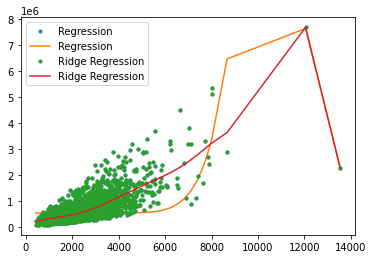

In [35]:
regressor = LinearRegression()
poly_set_1 = polynomial_sframe(set_1['sqft_living'],15)
model_set_1 = regressor.fit(poly_set_1, set_1['price'].values.reshape(-1,1))
print(model_set_1.intercept_)
print(model_set_1.coef_)
plt.plot(poly_set_1['power_1'],set_1['price'],'.',
         poly_set_1['power_1'], model_set_1.predict(poly_set_1),'-', label = 'Regression')

poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
model_1 = linear_model.Ridge(alpha=l2_small_penalty_2, normalize=True)
model_1.fit(poly15_set_1, set_1['price'])
print(model_1.intercept_)
print(model_1.coef_)
plt.plot(poly15_set_1['power_1'],set_1['price'],'.',
         poly15_set_1['power_1'], model_1.predict(poly15_set_1),'-',label = 'Ridge Regression')
plt.legend()
plt.show()

[506811.63557692]
[[ 2.68007787e-77 -1.28312344e-39 -1.45857231e-44  5.75867742e-50
   1.04404871e-53  1.35479902e-58  3.62867885e-55  1.49807495e-51
   5.73974481e-48  1.95158348e-44  5.37897084e-41  9.38035610e-38
  -3.62478342e-41  4.63968399e-45 -1.96500572e-49]]
-55614.64217730577
[ 8.59362648e+02 -8.18118261e-01  4.28879960e-04 -9.12770510e-08
 -2.69604904e-12  3.73980378e-15 -1.42711889e-19 -6.30794839e-23
 -1.44559472e-27  7.44321282e-31  9.25865979e-35  3.28000084e-41
 -1.29543510e-42 -1.38781249e-46  1.66546443e-50]


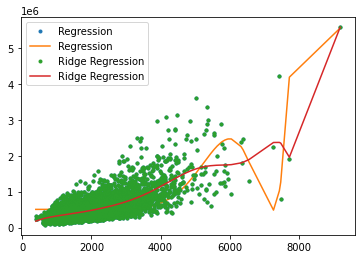

In [36]:
poly_set_2 = polynomial_sframe(set_2['sqft_living'],15)
model_set_2 = regressor.fit(poly_set_2, set_2['price'].values.reshape(-1,1))
print(model_set_2.intercept_)
print(model_set_2.coef_)
plt.plot(poly_set_2['power_1'],set_2['price'],'.',
         poly_set_2['power_1'], model_set_2.predict(poly_set_2),'-', label = 'Regression')



poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
model_2 = linear_model.Ridge(alpha=l2_small_penalty_2, normalize=True)
model_2.fit(poly15_set_2, set_2['price'])
print(model_2.intercept_)
print(model_2.coef_)
plt.plot(poly15_set_2['power_1'],set_2['price'],'.',
         poly15_set_2['power_1'], model_2.predict(poly15_set_2),'-', label ='Ridge Regression')
plt.legend()
plt.show()

[530874.31665335]
[[ 2.83751934e-88 -3.80811885e-49 -8.53617144e-55 -3.98272978e-59
   1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
   9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
   3.33756141e-43 -6.76238818e-47  3.43132932e-51]]
470987.85318170115
[-7.55395905e+02  9.75579484e-01 -4.58945983e-04  7.77958085e-08
  7.15013359e-12 -2.88601991e-15 -2.13677618e-20  3.38085194e-23
  2.19178144e-27 -1.97067748e-31 -4.15993069e-35 -1.80196282e-39
  3.19071197e-43  5.08456893e-47 -3.93304248e-51]


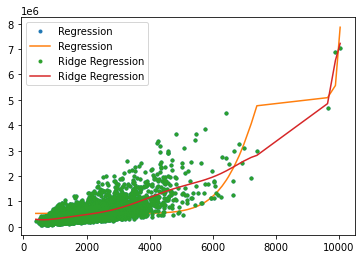

In [37]:
poly_set_3 = polynomial_sframe(set_3['sqft_living'],15)
model_set_3 = regressor.fit(poly_set_3, set_3['price'].values.reshape(-1,1))
print(model_set_3.intercept_)
print(model_set_3.coef_)
plt.plot(poly_set_3['power_1'],set_3['price'],'.',
         poly_set_3['power_1'], model_set_3.predict(poly_set_3),'-', label = 'Regression')



poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
model_3 = linear_model.Ridge(alpha=l2_small_penalty_2, normalize=True)
model_3.fit(poly15_set_3, set_3['price'])
print(model_3.intercept_)
print(model_3.coef_)
plt.plot(poly15_set_3['power_1'],set_3['price'],'.',
         poly15_set_3['power_1'], model_3.predict(poly15_set_3),'-', label ='Ridge Regression')
plt.legend()
plt.show()

[494822.42714189]
[[ 1.37062035e-76 -7.34929426e-40 -2.48457909e-44  3.04237765e-49
   4.17619486e-53  1.30559251e-54  1.27051326e-54  4.87799084e-51
   1.73524691e-47  5.46982653e-44  1.39568452e-40  2.25011155e-37
  -9.43820708e-41  1.31553951e-44 -6.09073061e-49]]
-145655.6290092955
[ 1.11944575e+03 -9.83760261e-01  3.38770930e-04  3.60377094e-08
 -4.37813997e-11  5.77191674e-15  7.66795232e-19 -9.49297701e-23
 -1.96030821e-26 -2.10877445e-32  3.31005001e-34  3.47733920e-38
 -2.43039242e-42 -8.79553342e-46  6.44569711e-50]


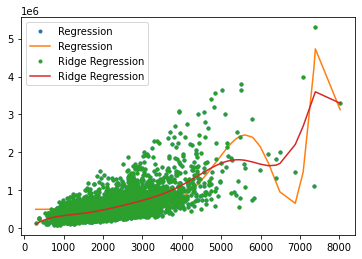

In [38]:
poly_set_4 = polynomial_sframe(set_4['sqft_living'],15)
model_set_4 = regressor.fit(poly_set_4, set_4['price'].values.reshape(-1,1))
print(model_set_4.intercept_)
print(model_set_4.coef_)
plt.plot(poly_set_4['power_1'],set_4['price'],'.',
         poly_set_4['power_1'], model_set_4.predict(poly_set_4),'-', label = 'Regression')



poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
model_4 = linear_model.Ridge(alpha=l2_small_penalty_2, normalize=True)
model_4.fit(poly15_set_4, set_4['price'])
print(model_4.intercept_)
print(model_4.coef_)
plt.plot(poly15_set_4['power_1'],set_4['price'],'.',
         poly15_set_4['power_1'], model_4.predict(poly15_set_4),'-', label ='Ridge Regression')
plt.legend()
plt.show()

## Linear Regression/Regression Function

In [41]:
def ridge_model(df, penalty_value):    
    poly15_df = polynomial_sframe(df['sqft_living'], 15)
    

    model_regression = regressor.fit(poly15_df, df['price'].values.reshape(-1,1))
    print(model_regression.intercept_)
    print(model_regression.coef_)
    plt.plot(poly15_df['power_1'],df['price'],'.',
             poly15_df['power_1'], model_regression.predict(poly15_df),'-', label = 'Regression')

  
    model_ridge = linear_model.Ridge(alpha=penalty_value, normalize=True)
    model_ridge.fit(poly15_df, df['price'])
    print(model_ridge.intercept_)
    print(model_ridge.coef_)
    plt.plot(poly15_df['power_1'],df['price'],'.',
             poly15_df['power_1'], model_ridge.predict(poly15_df),'-', label ='Ridge Regression')
    plt.legend()
    plt.show()

[539058.81866914]
[[ 3.05794168e-90  2.21229707e-49  8.63660731e-55  1.21888907e-88
   3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
   4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
   3.62176959e-44 -5.63501661e-48  2.18641116e-52]]
539103.0310577954
[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58]


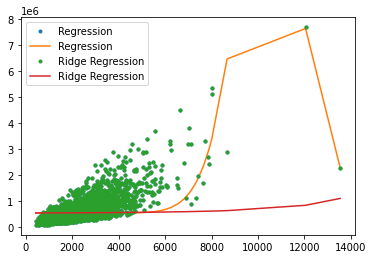

[506811.63557692]
[[ 2.68007787e-77 -1.28312344e-39 -1.45857231e-44  5.75867742e-50
   1.04404871e-53  1.35479902e-58  3.62867885e-55  1.49807495e-51
   5.73974481e-48  1.95158348e-44  5.37897084e-41  9.38035610e-38
  -3.62478342e-41  4.63968399e-45 -1.96500572e-49]]
529853.0253577976
[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55]


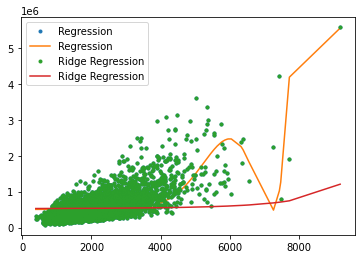

[530874.31665335]
[[ 2.83751934e-88 -3.80811885e-49 -8.53617144e-55 -3.98272978e-59
   1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
   9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
   3.33756141e-43 -6.76238818e-47  3.43132932e-51]]
533640.1140974432
[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56]


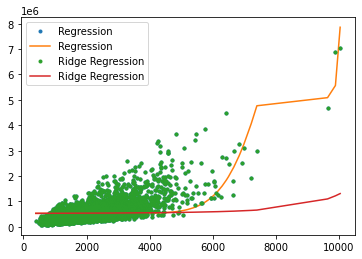

[494822.42714189]
[[ 1.37062035e-76 -7.34929426e-40 -2.48457909e-44  3.04237765e-49
   4.17619486e-53  1.30559251e-54  1.27051326e-54  4.87799084e-51
   1.73524691e-47  5.46982653e-44  1.39568452e-40  2.25011155e-37
  -9.43820708e-41  1.31553951e-44 -6.09073061e-49]]
524562.9690466832
[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-47 6.85958087e-51 8.30843630e-55]


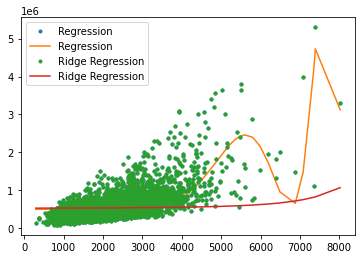

In [43]:
l2_penalty_large = 1.23e2
ridge_model(set_1, l2_penalty_large)
ridge_model(set_2, l2_penalty_large)
ridge_model(set_3, l2_penalty_large)
ridge_model(set_4, l2_penalty_large)

### The curves vary a lot less due to the large regularized value.

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. The package turicreate_cross_validation (see below) has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use `seed=1` to get consistent answer.)

  
_Note:_ For applying cross-validation, we will import a package called `turicreate_cross_validation`. To install it, please run this command on your terminal:

`pip install -e git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation`

You can find the documentation on this package here: https://github.com/Kagandi/turicreate-cross-validation

In [44]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [51]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    print (i, (start, end))

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [60]:
validation_set = train_valid_shuffled[1939:3878+1]
training_set = train_valid_shuffled[0:1939].append(train_valid_shuffled[3878+1:n])
training_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0


In [61]:
poly15_train_valid_shuffled = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)

In [64]:
output = train_valid_shuffled['price']
output[1938:3878+1]

1938     427000.0
1939     334998.0
1940     508000.0
1941     441000.0
1942    3000000.0
          ...    
3874     296500.0
3875     621000.0
3876     545000.0
3877     263000.0
3878    1875000.0
Name: price, Length: 1941, dtype: float64

In [73]:
def k_fold_cross_validation(k, l2_penalty, input_df, output):
    RSS_k_fold = []
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        validation_set = input_df[start:end+1]
        training_set = input_df[0:start].append(input_df[end+1:n])
        output_valid = output[start:end+1]
        output_train = output[0:start].append(output[end+1:n])
        model_ridge = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model_ridge.fit(training_set, output_train)
        predicted_value = model_ridge.predict(validation_set)
        residuals = output_valid - predicted_value
        RSS = sum(value**2 for value in residuals)
        RSS_k_fold.append(RSS)
    return np.mean(RSS_k_fold)

In [74]:
print(k_fold_cross_validation(10, 1.23e2, poly15_train_valid_shuffled, train_valid_shuffled['price']))

258740726050977.1


In [97]:
l2_penalty_list = np.logspace(3, 9, num=13)

In [98]:
l2_penalty_RSS =[]
for value in l2_penalty_list:
    RSS_k_fold = k_fold_cross_validation(10, value, poly15_train_valid_shuffled, train_valid_shuffled['price'])
    print("The average RSS value for l2_penalty {}    is    {}".format(value, RSS_k_fold))
    l2_penalty_RSS.append(RSS_k_fold)

The average RSS value for l2_penalty 1000.0    is    264977361036975.9
The average RSS value for l2_penalty 3162.2776601683795    is    265692935858318.25
The average RSS value for l2_penalty 10000.0    is    265924368957215.7
The average RSS value for l2_penalty 31622.776601683792    is    265998081509342.8
The average RSS value for l2_penalty 100000.0    is    266021444553980.5
The average RSS value for l2_penalty 316227.7660168379    is    266028837918724.44
The average RSS value for l2_penalty 1000000.0    is    266031176438468.16
The average RSS value for l2_penalty 3162277.6601683795    is    266031915996607.25
The average RSS value for l2_penalty 10000000.0    is    266032149870752.6
The average RSS value for l2_penalty 31622776.60168379    is    266032223828783.75
The average RSS value for l2_penalty 100000000.0    is    266032247216419.94
The average RSS value for l2_penalty 316227766.01683795    is    266032254612245.0
The average RSS value for l2_penalty 1000000000.0    is  

In [99]:
min(l2_penalty_RSS)

264977361036975.9

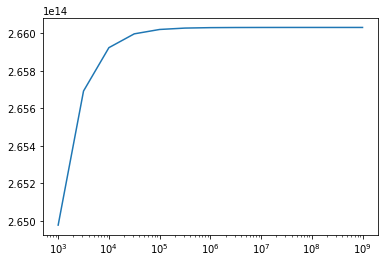

In [100]:
plt.plot(l2_penalty_list, l2_penalty_RSS)
plt.xscale('log')

In [101]:
model_ridge_train_valid = linear_model.Ridge(alpha=10, normalize=True)
model_ridge_train_valid.fit(poly15_train_valid_shuffled, train_valid_shuffled['price'])

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [102]:
predicted_test = model_ridge_train_valid.predict(polynomial_sframe(test['sqft_living'], 15))

In [103]:
residuals = predicted_test - test['price']
RSS_test = sum(value **2 for value in residuals)

In [104]:
RSS_test

229953745232504.8